<a href="https://colab.research.google.com/github/Ashoksai-tech/Advance_deep_learning_projects/blob/main/Fashion_Dataset_Analysis_using_tensorflow_and_keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Approach of the problem
* Load the model and libraries

*  Declare the model
      sequential : sequence of layers
      functional : multi modal/ transfer learning

*  Declare the layers

*  Dense, Dropout

*  Neurons, Activation Function

*  compile the model
        * optimizer(SGD, Adam)
        * loss function(cross entropy, MSE, RMSE)
        * Metrics(Accuracy, F!, Recall, precision)

*  Fit the model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from keras.utils import to_categorical

In [ ]:
!unzip '/content/archive (31).zip'

Archive:  /content/archive (31).zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [ ]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
np.max(train.values)

255

In [ ]:
train['label'].value_counts()

,count
label,
2,6000
9,6000
6,6000
0,6000
3,6000
4,6000
5,6000
8,6000
7,6000


data visualization

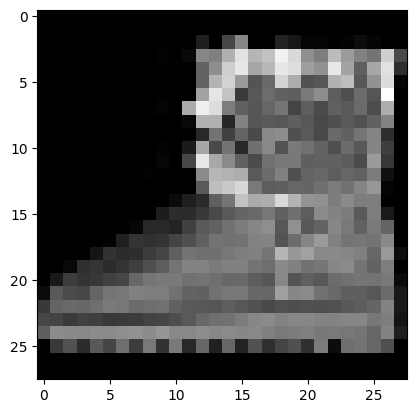

In [ ]:
#features = train.columns[1:]  # Assuming the first column is 'label' and the rest are pixel data
features = ['pixel{}'.format(pixel_num) for pixel_num in range(1,785)]
rows_to_examine = 12
image_data = np.reshape(train[features].iloc[rows_to_examine].to_numpy(),(28,28))
plt.imshow(image_data, cmap='gray')
plt.show()

In [ ]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [ ]:
x_train = train.drop('label',axis=1)
y_train = train['label']

x_test = test.drop('label',axis=1)
y_test = test['label']

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
print(x_train)

       pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8  \
0         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
1         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3         0.0     0.0     0.0  0.003922  0.007843     0.0     0.0  0.000000   
4         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
...       ...     ...     ...       ...       ...     ...     ...       ...   
59995     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59996     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59997     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59998     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59999     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

       pixel9  pixel10  ...  pixel775  pixel776  pi

In [ ]:
print(x_test)

      pixel1    pixel2    pixel3  pixel4  pixel5  pixel6    pixel7    pixel8  \
0        0.0  0.000000  0.000000     0.0     0.0     0.0  0.000000  0.035294   
1        0.0  0.000000  0.000000     0.0     0.0     0.0  0.000000  0.000000   
2        0.0  0.000000  0.000000     0.0     0.0     0.0  0.054902  0.207843   
3        0.0  0.000000  0.000000     0.0     0.0     0.0  0.000000  0.000000   
4        0.0  0.000000  0.000000     0.0     0.0     0.0  0.000000  0.000000   
...      ...       ...       ...     ...     ...     ...       ...       ...   
9995     0.0  0.000000  0.000000     0.0     0.0     0.0  0.000000  0.000000   
9996     0.0  0.000000  0.000000     0.0     0.0     0.0  0.000000  0.000000   
9997     0.0  0.000000  0.000000     0.0     0.0     0.0  0.000000  0.000000   
9998     0.0  0.003922  0.011765     0.0     0.0     0.0  0.000000  0.000000   
9999     0.0  0.000000  0.000000     0.0     0.0     0.0  0.000000  0.549020   

        pixel9   pixel10  ...  pixel775

Reshaping 2d into 3d images for better understanding

In [ ]:
x_train = x_train.values.reshape(len(x_train),28,28,1)
x_test = x_test.values.reshape(len(x_test),28,28,1)

In [ ]:
print(x_train)

[[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0. 

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Data Augumentation - it actually reduces overfit of the model it will apply specified transformation with each image in batch

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
Gen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
Gen.fit(x_train)

Building the model

In [ ]:
from tensorflow.keras.layers import Reshape, Flatten

model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 28, 28, 128)         │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 28, 28, 128)         │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 28, 28, 128)         │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │       1,003,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,036,810 (3.96 MB)

 Trainable params: 1,036,810 (3.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train,batch_size=128,epochs=30,verbose=1,validation_data=(x_test,y_test))

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9526 - loss: 0.1238 - val_accuracy: 0.8609 - val_loss: 0.5579
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9499 - loss: 0.1319 - val_accuracy: 0.8606 - val_loss: 0.5460
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9525 - loss: 0.1258 - val_accuracy: 0.8597 - val_loss: 0.5461
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9542 - loss: 0.1226 - val_accuracy: 0.8602 - val_loss: 0.5687
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9554 - loss: 0.1185 - val_accuracy: 0.8572 - val_loss: 0.5554
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9529 - loss: 0.1224 - val_accuracy: 0.8576 - val_loss: 0.5921
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9504 - loss: 0.1256 - val_accuracy: 0.8611 - val_loss: 0.5732
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9569 - loss: 0.1148 

In [ ]:
test_acc = test_loss = model.evaluate(x_test,y_test,verbose=2)
print('Test Accuracy:',test_acc)
print('Test Loss:',test_loss)

313/313 - 1s - 3ms/step - accuracy: 0.8565 - loss: 0.8547
Test Accuracy: [0.8547395467758179, 0.8565000295639038]
Test Loss: [0.8547395467758179, 0.8565000295639038]


In [ ]:
predictions = model.predict(x_test)
predictions_labels = np.argmax(predictions,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(predictions_labels[:10])
print(np.argmax(y_test,axis=1)[:10])

[0 1 2 2 2 6 8 3 5 0]
[0 1 2 2 3 2 8 6 5 0]


In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

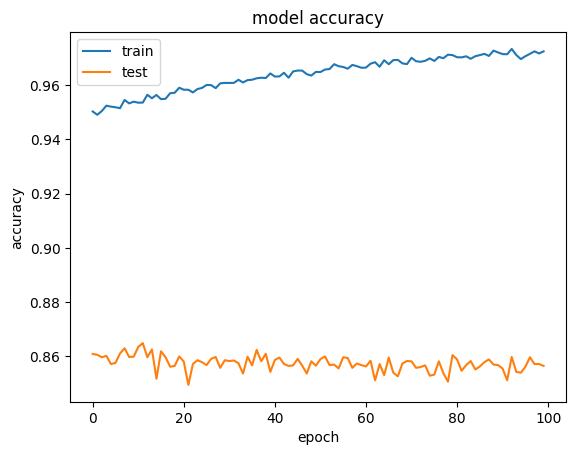

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

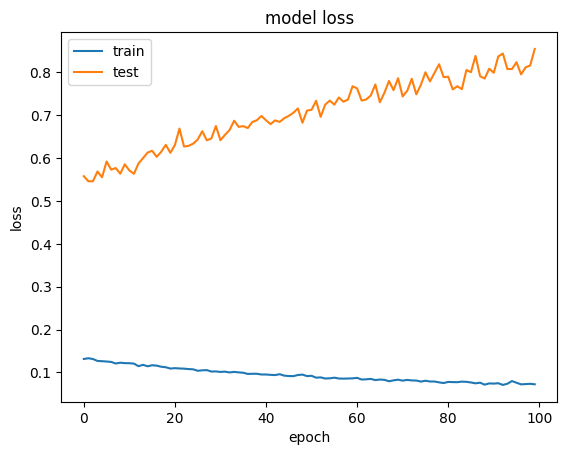

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

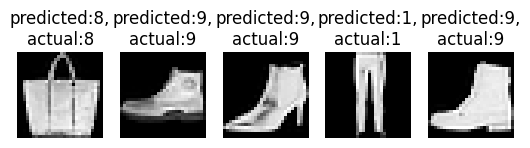

In [ ]:
num_images = 5
indices = np.random.choice(len(x_test),num_images,replace=False)

for i,index in enumerate(indices):

  plt.subplot(1,num_images,i+1)
  plt.imshow(x_test[index].reshape(28,28),cmap='gray')
  plt.title(f'predicted:{predictions_labels[index]},\nactual:{np.argmax(y_test[index])}')
  plt.axis('off')